# Smartphone Price Prediction 

# Introduction

In [1]:
#The libraries which we are going to use

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.chdir("C:\\Users\\Niveditha S\\OneDrive\\Desktop\\Intel_Project")

In [5]:
df=pd.read_csv('Smart_phone.csv')

In [7]:
df.head()

,battery_power,Bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
#Exploring the dataset
df.columns

Index(['battery_power', 'Bluetooth', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df.describe()

,battery_power,Bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   Bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
pd.isnull(df)


,battery_power,Bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
pd.isnull(df).sum()

battery_power    0
Bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

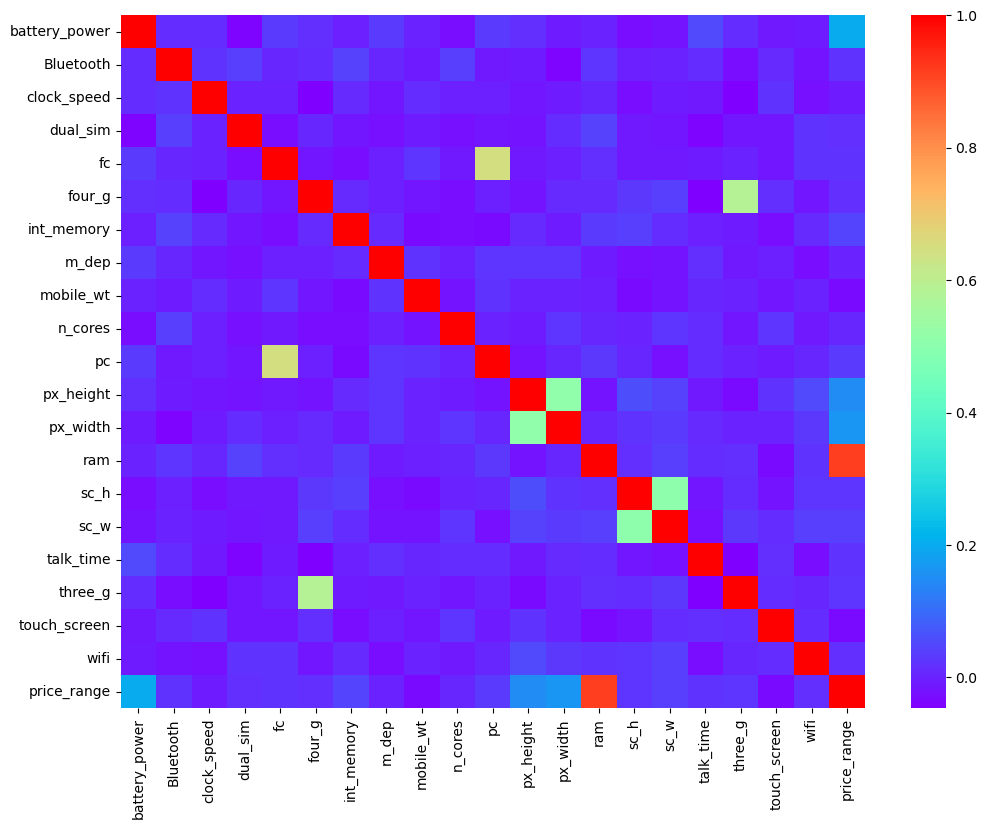

In [13]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='rainbow')

C:\Users\Niveditha S\AppData\Local\Temp\ipykernel_5408\398228500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_range'],kde=False,color='green')


<Axes: xlabel='price_range'>

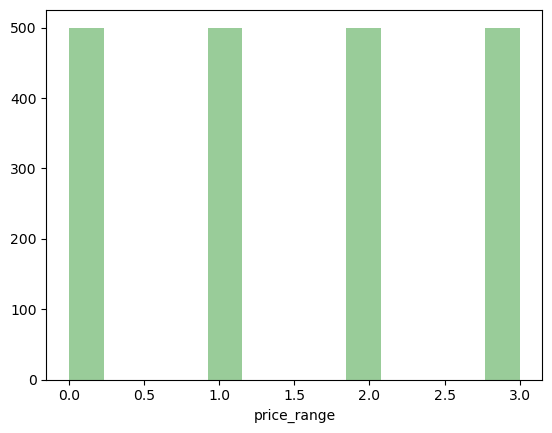

In [17]:
sns.distplot(df['price_range'],kde=False,color='green')

<Axes: xlabel='ram', ylabel='count'>

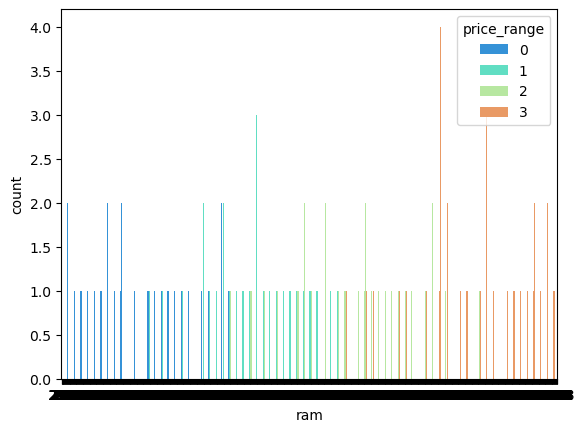

In [20]:
sns.countplot(x='ram',hue='price_range',data=df,palette='rainbow')

<Axes: xlabel='m_dep', ylabel='count'>

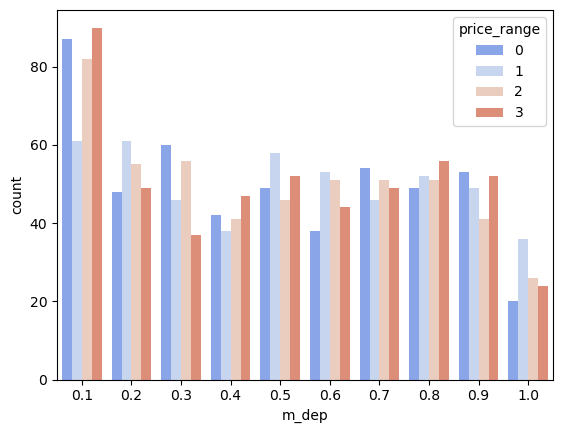

In [23]:
sns.countplot(x='m_dep',hue='price_range',data=df,palette='coolwarm')

<Axes: xlabel='Bluetooth', ylabel='count'>

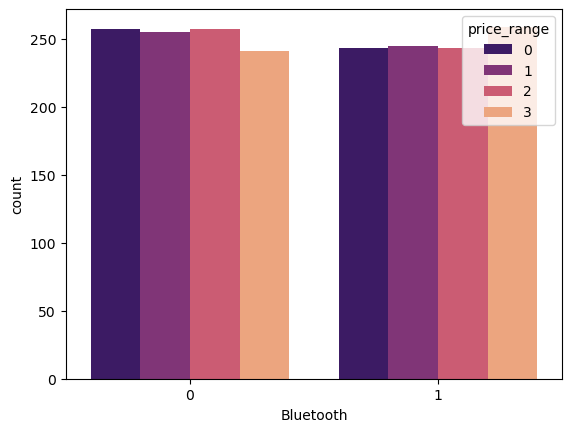

In [27]:
sns.countplot(x='Bluetooth',hue='price_range',data=df,palette='magma')

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Implementation of Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Niveditha S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions=lr.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,predictions))

[[114  28   2   0]
 [ 23  81  32   5]
 [  0  40  74  64]
 [  0   1  30 106]]


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       144
           1       0.54      0.57      0.56       141
           2       0.54      0.42      0.47       178
           3       0.61      0.77      0.68       137

    accuracy                           0.62       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.62      0.62      0.62       600



In [80]:
#CONCLUSION from Logistic Regression
accuracy_lr=62

# Implementation of Decision tree and Random Forest

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree=DecisionTreeClassifier()

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions=dtree.predict(X_test)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       144
           1       0.74      0.82      0.77       141
           2       0.82      0.75      0.78       178
           3       0.85      0.88      0.86       137

    accuracy                           0.82       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.82      0.83       600



In [50]:
print(confusion_matrix(y_test,predictions))

[[126  18   0   0]
 [ 13 115  13   0]
 [  0  23 133  22]
 [  0   0  16 121]]


In [81]:
#CONCLUSION from Decision Tree
accuracy_dt=82

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
predictions=rfc.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       144
           1       0.79      0.87      0.83       141
           2       0.88      0.79      0.83       178
           3       0.91      0.93      0.92       137

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [77]:
print(confusion_matrix(y_test,predictions))

[[139   5   0   0]
 [ 10 125   6   0]
 [  0  15 152  11]
 [  0   0  12 125]]


In [78]:
#CONCLUSION from Random Forest
accuracy_rft=88

# K-Nearest Neighbors(KNN) 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier(n_neighbors=1)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
predictions=knn.predict(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       144
           1       0.86      0.89      0.87       141
           2       0.89      0.85      0.87       178
           3       0.92      0.91      0.92       137

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



In [66]:
print(confusion_matrix(y_test,predictions))

[[139   5   0   0]
 [ 10 125   6   0]
 [  0  15 152  11]
 [  0   0  12 125]]


In [68]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

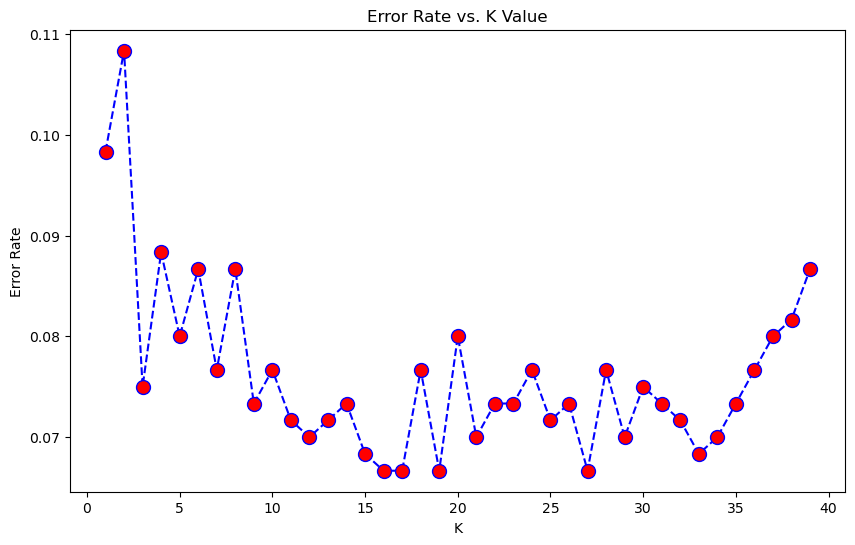

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
k_pred=knn.predict(X_test)
print('WITH K= 16')

print(classification_report(y_test,k_pred))

print(confusion_matrix(y_test,k_pred))

WITH K= 16
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       144
           1       0.88      0.94      0.91       141
           2       0.92      0.90      0.91       178
           3       0.98      0.91      0.95       137

    accuracy                           0.93       600
   macro avg       0.94      0.94      0.93       600
weighted avg       0.93      0.93      0.93       600

[[142   2   0   0]
 [  6 133   2   0]
 [  0  16 160   2]
 [  0   0  12 125]]


In [76]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
k_pred=knn.predict(X_test)
print('WITH K= 27')

print(classification_report(y_test,k_pred))

print(confusion_matrix(y_test,k_pred))

WITH K= 27
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.89      0.94      0.91       141
           2       0.93      0.89      0.91       178
           3       0.96      0.93      0.94       137

    accuracy                           0.93       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.93      0.93      0.93       600

[[141   3   0   0]
 [  6 133   2   0]
 [  0  14 159   5]
 [  0   0  10 127]]


In [96]:
#CONCLUSION from KNN
accuracy_knn=93

# CONCLUSION

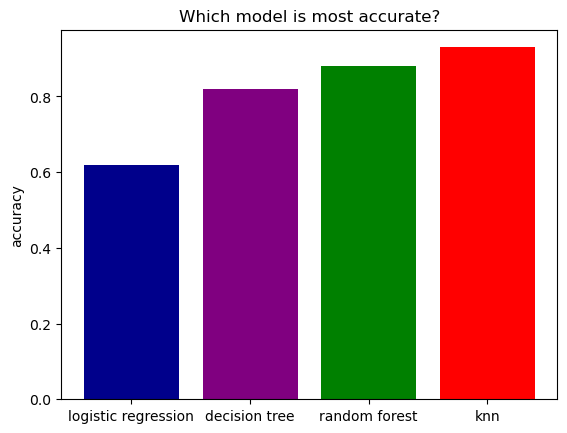

In [99]:
models = ['logistic regression', 'decision tree', 'random forest', 'knn']
acc_scores = [0.62, 0.82, 0.88, 0.93]

plt.bar(models, acc_scores, color=['darkblue', 'purple', 'green', 'red'])
plt.ylabel("accuracy")
plt.title("Which model is most accurate?")
plt.show()

In [112]:
os.chdir('C:\\Users\\Niveditha S\\OneDrive\\Desktop\\Intel_Project')

In [113]:
df1=pd.read_csv('sp_test.csv')

In [114]:
df1.head()

,id,battery_power,Bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [115]:
df1=df1.drop('id',axis=1)

In [116]:
df1.head()

,battery_power,Bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [120]:
pred_price=knn.predict(df1)

In [124]:
pred_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [125]:
df1['price_range']=pred_price

In [126]:
df1.head()

,battery_power,Bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
